In [1151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/car.csv', index_col="car_ID")
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [1152]:
feature_names = list(data.columns)
feature_names.remove("price")
X = data[feature_names]
y = data["price"]
X

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23


In [1153]:
X.isnull().sum().sum(), X.duplicated().any()  # Wow, looks like our data is clean to an extent

(0, False)

In [1154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
161,0,toyota corona,gas,std,four,sedan,fwd,front,95.7,166.3,...,four,98,2bbl,3.19,3.03,9.0,70,4800,38,47
99,2,nissan clipper,gas,std,two,hardtop,fwd,front,95.1,162.4,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25
48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19
92,1,nissan rogue,gas,std,two,sedan,fwd,front,94.5,165.3,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,...,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24
65,0,mazda 626,gas,std,four,hatchback,fwd,front,98.8,177.8,...,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32
16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,...,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22


### Feature Engineering

In [1155]:
X['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [1156]:
car_brands = X.CarName.str.split().str[0]
X_train.drop("CarName", axis=1, inplace=True)
car_brands.value_counts()

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [1157]:
# Redundancy removal
r_vals = {'Nissan': 'nissan', 'toyouta': 'toyota', 'maxda': 'mazda', 'porcshce': 'porsche', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}
car_brands.replace(r_vals, inplace=True)
car_brands_list = car_brands.value_counts().index.to_numpy()
car_brands.value_counts()

CarName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [1158]:
car_brands_en = pd.get_dummies(car_brands, prefix="car").astype('int64')
categories = "car_" + car_brands_list[:12]
car_brands_en

,car_alfa-romero,car_audi,car_bmw,car_buick,car_chevrolet,car_dodge,car_honda,car_isuzu,car_jaguar,car_mazda,...,car_nissan,car_peugeot,car_plymouth,car_porsche,car_renault,car_saab,car_subaru,car_toyota,car_volkswagen,car_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1159]:
car_brands_en_train = car_brands_en.loc[X_train.index, categories]
car_brands_en_test = car_brands_en.loc[X_test.index, categories]
car_brands_en_train.shape, car_brands_en_test.shape

((164, 12), (41, 12))

In [1160]:
car_brands_en_train

,car_toyota,car_nissan,car_mazda,car_mitsubishi,car_honda,car_volkswagen,car_subaru,car_peugeot,car_volvo,car_dodge,car_buick,car_bmw
car_ID,,,,,,,,,,,,
161,1,0,0,0,0,0,0,0,0,0,0,0
99,0,1,0,0,0,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,0,0
92,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0,0,0,0,0,0,1,0,0,0,0
65,0,0,1,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,0,1


In [1161]:
base = LinearRegression().fit(car_brands_en_train, y_train)
r2_score(y_test, base.predict(car_brands_en_test)), mean_absolute_error(y_test, base.predict(car_brands_en_test))    # Poor contribution

(0.3886517291502303, 3820.204232826524)

In [1162]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 161 to 10
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         164 non-null    int64  
 1   fueltype          164 non-null    object 
 2   aspiration        164 non-null    object 
 3   doornumber        164 non-null    object 
 4   carbody           164 non-null    object 
 5   drivewheel        164 non-null    object 
 6   enginelocation    164 non-null    object 
 7   wheelbase         164 non-null    float64
 8   carlength         164 non-null    float64
 9   carwidth          164 non-null    float64
 10  carheight         164 non-null    float64
 11  curbweight        164 non-null    int64  
 12  enginetype        164 non-null    object 
 13  cylindernumber    164 non-null    object 
 14  enginesize        164 non-null    int64  
 15  fuelsystem        164 non-null    object 
 16  boreratio         164 non-null    float64
 17  s

In [1163]:
X["cylindernumber"].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [1164]:
cylinder_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
X_train["cylindernumber"].replace(cylinder_dict, inplace=True)
X_test["cylindernumber"].replace(cylinder_dict, inplace=True)
X_train["cylindernumber"].dtype, X_test["cylindernumber"].dtype

(dtype('int64'), dtype('int64'))

### Data Visualization

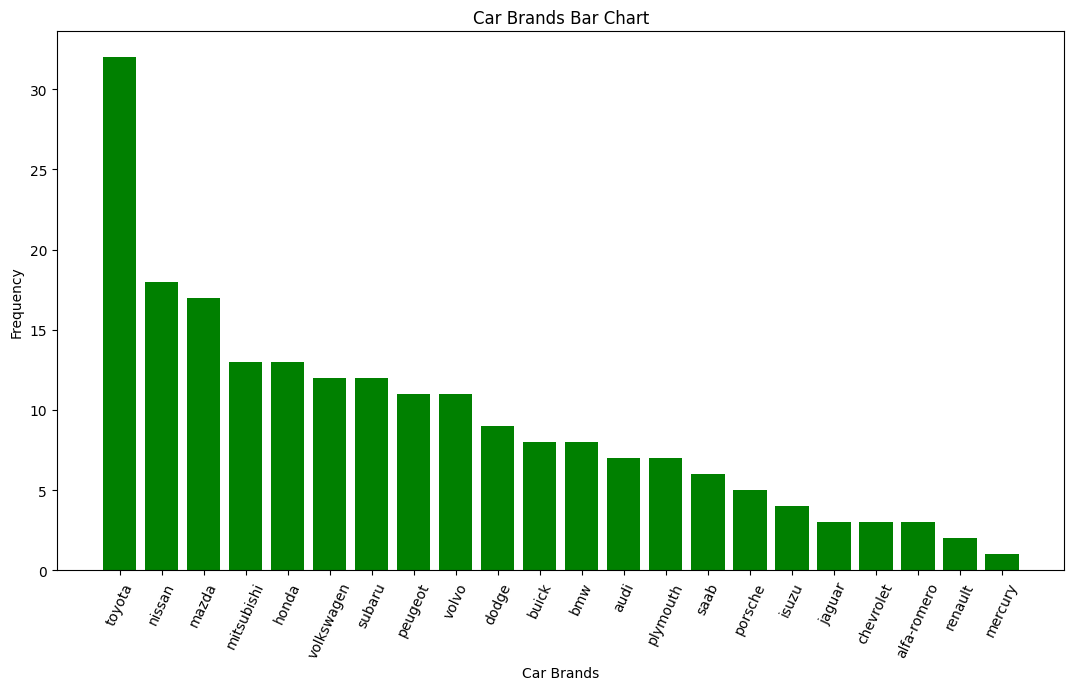

In [1165]:
cb_vals = car_brands.value_counts()
plt.figure(figsize=(13, 7))
plt.bar(cb_vals.index, cb_vals, color='green')
plt.xlabel('Car Brands')
plt.ylabel('Frequency')
plt.title('Car Brands Bar Chart')
plt.xticks(rotation=65)
plt.show()

Text(0.5, 0, 'Engine Type')

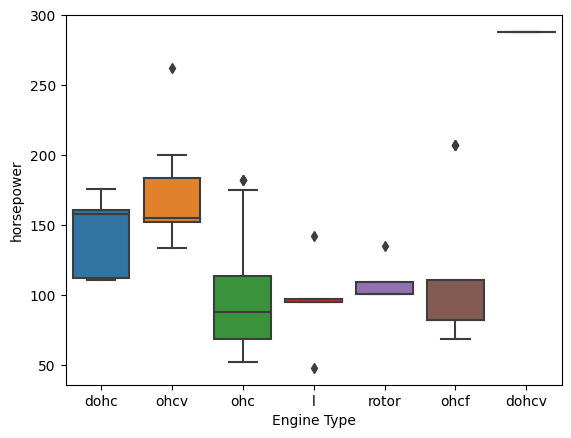

In [1166]:
sns.boxplot(X, x='enginetype', y='horsepower')
plt.xlabel('Engine Type')

Text(0, 0.5, 'Engine Size')

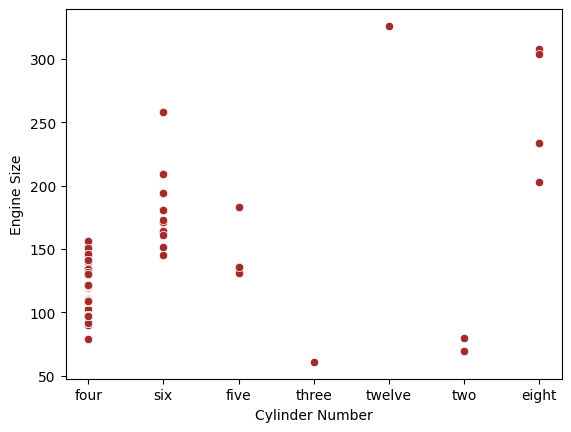

In [1167]:
sns.scatterplot(X, x='cylindernumber', y='enginesize', color='brown')
plt.xlabel('Cylinder Number')
plt.ylabel('Engine Size')

<Axes: xlabel='carbody', ylabel='curbweight'>

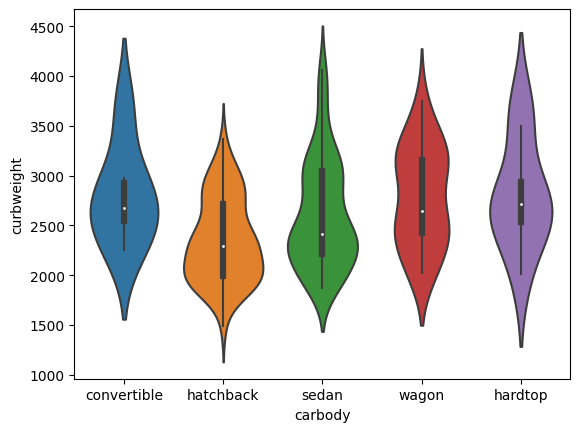

In [1168]:
sns.violinplot(X, x='carbody', y='curbweight')

### Feature Engineering II

##### View structure of all categorical columns

In [1169]:
X_train["fueltype"].value_counts() 

fueltype
gas       151
diesel     13
Name: count, dtype: int64

In [1170]:
X_train["aspiration"].value_counts()

aspiration
std      134
turbo     30
Name: count, dtype: int64

In [1171]:
X_train["doornumber"].value_counts()

doornumber
four    94
two     70
Name: count, dtype: int64

In [1172]:
X_train["carbody"].value_counts()

carbody
sedan          78
hatchback      54
wagon          20
hardtop         7
convertible     5
Name: count, dtype: int64

In [1173]:
X_train["drivewheel"].value_counts()

C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


drivewheel
fwd    99
rwd    57
4wd     8
Name: count, dtype: int64

In [1174]:
X_train["enginelocation"].value_counts()

enginelocation
front    161
rear       3
Name: count, dtype: int64

In [1175]:
X_train["enginetype"].value_counts()

enginetype
ohc      121
ohcf      14
dohc      10
l          9
ohcv       8
rotor      2
Name: count, dtype: int64

In [1176]:
X_train["fuelsystem"].value_counts()

fuelsystem
mpfi    74
2bbl    56
idi     13
spdi     9
1bbl     9
4bbl     2
mfi      1
Name: count, dtype: int64

#### View contribution of categorical columns

In [1177]:
categorical_cols = [val for val in X_train.columns if X_train[val].dtype == 'object']
categorical_X_train = X_train[categorical_cols]
categorical_X_test = X_test[categorical_cols]
base = Pipeline(steps=[
    ('en', OneHotEncoder(drop='first', handle_unknown='ignore')),
    ('model', LinearRegression())
])
base.fit(categorical_X_train, y_train)
pred = base.predict(categorical_X_test)
mean_absolute_error(y_test, pred), r2_score(y_test, pred)

C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(3935.533875377004, 0.4143022182716437)

In [1178]:
numerical_cols = [val for val in X_train.columns if X_train[val].dtype != 'object']
numerical_X_train = X_train[numerical_cols]
numerical_X_test = X_test[numerical_cols]
base = LinearRegression().fit(numerical_X_train, y_train)
pred = base.predict(numerical_X_test)
mean_absolute_error(y_test, pred), r2_score(y_test, pred)

(3196.013608805178, 0.5335218015440352)

#### Final Feature Selection

In [1179]:
# Numerical + CarName

X_train = pd.concat([numerical_X_train, car_brands_en_train], axis=1)
X_test = pd.concat([numerical_X_test, car_brands_en_test], axis=1)
base = LinearRegression().fit(X_train, y_train)
pred = base.predict(X_test)
mean_absolute_error(y_test, pred), r2_score(y_test, pred)  # Car name has a positive impact on the dataset

(2706.1943082788493, 0.7301511359267585)

In [1180]:
# Numerical + Categorical

X_train = pd.concat([numerical_X_train, categorical_X_train], axis=1)
X_test = pd.concat([numerical_X_test, categorical_X_test], axis=1)
base = Pipeline(steps=[
    ('en', ColumnTransformer([('en', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)], remainder='passthrough')),
    ('model', LinearRegression())
])
base.fit(X_train, y_train)
pred = base.predict(X_test)
mean_absolute_error(y_test, pred), r2_score(y_test, pred)

C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(2990.3955792682927, 0.5533224848650573)

In [1181]:
# All three

X_train = pd.concat([numerical_X_train, car_brands_en_train, categorical_X_train], axis=1)
X_test = pd.concat([numerical_X_test, car_brands_en_test, categorical_X_test], axis=1)
base = Pipeline(steps=[
    ('pre', ColumnTransformer([('en', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)], remainder='passthrough')),
    ('model', LinearRegression()),
])
base.fit(X_train, y_train)
pred = base.predict(X_test)
mean_absolute_error(y_test, pred), r2_score(y_test, pred)
# Best combination

C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(1991.6669207317073, 0.8690126883637784)

### Pipelines and transformers

In [1182]:
categorical_cols = [val for val in X_train.columns if X_train[val].dtype == 'object']
numerical_cols = [val for val in X_train.columns if X_train[val].dtype != 'object']

preprocessors = ColumnTransformer(transformers=[
    ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('numerical', StandardScaler(), numerical_cols),
])

### Modelling and hyperparameter optimization

In [1183]:
models = {
    'linear_reg': LinearRegression(),
    'xgboost': XGBRegressor(),
    'knn': KNeighborsRegressor(),
    'random_forest': RandomForestRegressor(),
}

best_models = {}
best_params = {}
for model_name, model in models.items():
    if model_name == 'linear_reg':
        param_dict = {
            'modelling__fit_intercept': [True, False],
        }
    elif model_name == 'xgboost':
        param_dict = {
            'modelling__learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 1.0],
            'modelling__n_estimators': range(1, 30, 1),
        }
    elif model_name == 'knn':
        param_dict = {
            'modelling__n_neighbors': range(4, 20),
            }
    else:
        param_dict = {
            'modelling__n_estimators': range(1, 30, 1),
        }
    
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessors),
        ('modelling', model)
    ])

    rand_search = RandomizedSearchCV(pipeline, param_distributions=param_dict, cv=5)
    rand_search.fit(X_train, y_train)

    best_models[model_name] = rand_search.best_estimator_
    best_params[model_name] = rand_search.best_params_

C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\U

### Evaluation and cross-validation

In [1184]:
best_params

{'linear_reg': {'modelling__fit_intercept': True},
 'xgboost': {'modelling__n_estimators': 27, 'modelling__learning_rate': 0.2},
 'knn': {'modelling__n_neighbors': 9},
 'random_forest': {'modelling__n_estimators': 29}}

In [1185]:
scores = {}
for model_name, model in best_models.items():
    cv = KFold(n_splits=5, shuffle=True, random_state=10)
    score_arr = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    scores[model_name] = score_arr
    scores[f"{model_name} mean"] = score_arr.mean()

C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\M

In [1186]:
scores

{'linear_reg': array([ 8.70536405e-01,  9.51817750e-01,  9.18373784e-01, -1.73432737e+22,
         8.41906740e-01]),
 'linear_reg mean': -3.4686547345734836e+21,
 'xgboost': array([0.87117174, 0.9506317 , 0.93622298, 0.93201239, 0.91498381]),
 'xgboost mean': 0.9210045245209564,
 'knn': array([0.71058538, 0.71864925, 0.86071796, 0.76006189, 0.84630097]),
 'knn mean': 0.7792630898740516,
 'random_forest': array([0.85910815, 0.9585789 , 0.92312932, 0.93694997, 0.92189955]),
 'random_forest mean': 0.9199331787775442}

In [1187]:
model = best_models["xgboost"]  # The best
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'fuelsystem']),
                                                 ('numerical', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'carheight', 'curbweight',
                                                   'cylinder...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=27, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [1188]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)

C:\Users\MACHINE\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(0.8797239746853309, 1913.5850562118903)